# Assignment 3

In this coding assignment, you need to implement the discriminator of the DCGAN (and maybe tune some hyperparameters
 like the learning rates and the number of epochs)
to make your model generates some MNIST numbers. You can find a basic draft of the discriminator in the model.py
file. Fill the draft and train the model.



In [ ]:
import torch
import torch.nn as nn

import torchvision.transforms as transforms
import torch.utils.data as data_utils
from torchvision.datasets.mnist import MNIST

from model import Generator, Discriminator
from train import train_DCGAN

device = torch.device("cuda" if torch.cuda.is_available()  else "cpu")

Hyperparameters are listed here. You maybe need to play a little bit with.

In [2]:
g_lr = 0.002
d_lr = 0.0002
batch_size = 128
num_epochs = 10

In [3]:
trans = transforms.Compose([
            transforms.Scale(32),
            transforms.ToTensor(),
            transforms.Normalize((0.5, ), (0.5, )),
        ])

train_set = MNIST(root='.', train=True, transform=trans, download=True)
train_loader = data_utils.DataLoader(train_set, batch_size=batch_size, shuffle=True)


C:\Users\lenovo\Anaconda3\envs\CS323\lib\site-packages\torchvision\transforms\transforms.py:279: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


[0/10][0/469]	Loss_D: 1.6114	Loss_G: 0.8066	D(x): 0.5039	D(G(z)): 0.4986 / 0.5021
[0/10][50/469]	Loss_D: 1.5420	Loss_G: 0.7784	D(x): 0.5183	D(G(z)): 0.5168 / 0.5190
[0/10][100/469]	Loss_D: 1.5053	Loss_G: 0.7613	D(x): 0.5162	D(G(z)): 0.5190 / 0.5160
[0/10][150/469]	Loss_D: 1.5024	Loss_G: 0.7619	D(x): 0.5111	D(G(z)): 0.5098 / 0.5118
[0/10][200/469]	Loss_D: 1.5085	Loss_G: 0.7697	D(x): 0.5124	D(G(z)): 0.5127 / 0.5133
[0/10][250/469]	Loss_D: 1.5053	Loss_G: 0.7679	D(x): 0.5090	D(G(z)): 0.5120 / 0.5083
[0/10][300/469]	Loss_D: 1.5019	Loss_G: 0.7784	D(x): 0.5095	D(G(z)): 0.5070 / 0.5106
[0/10][350/469]	Loss_D: 1.5143	Loss_G: 0.7792	D(x): 0.5112	D(G(z)): 0.5083 / 0.5092
[0/10][400/469]	Loss_D: 1.5151	Loss_G: 0.7902	D(x): 0.5080	D(G(z)): 0.5047 / 0.5020
[0/10][450/469]	Loss_D: 1.4706	Loss_G: 0.7722	D(x): 0.5008	D(G(z)): 0.5046 / 0.5036


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


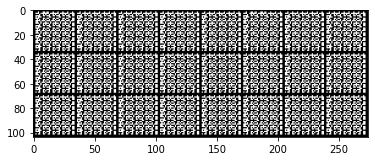

[1/10][0/469]	Loss_D: 1.4748	Loss_G: 0.7748	D(x): 0.5051	D(G(z)): 0.5001 / 0.5041
[1/10][50/469]	Loss_D: 1.4965	Loss_G: 0.7854	D(x): 0.5021	D(G(z)): 0.5082 / 0.5071
[1/10][100/469]	Loss_D: 1.4700	Loss_G: 0.7632	D(x): 0.5027	D(G(z)): 0.4992 / 0.4988
[1/10][150/469]	Loss_D: 1.4707	Loss_G: 0.7636	D(x): 0.5030	D(G(z)): 0.4982 / 0.4983
[1/10][200/469]	Loss_D: 1.4713	Loss_G: 0.7740	D(x): 0.5022	D(G(z)): 0.4981 / 0.5019
[1/10][250/469]	Loss_D: 1.4718	Loss_G: 0.7722	D(x): 0.4987	D(G(z)): 0.4974 / 0.5009
[1/10][300/469]	Loss_D: 1.4682	Loss_G: 0.7641	D(x): 0.4976	D(G(z)): 0.5018 / 0.4972
[1/10][350/469]	Loss_D: 1.4771	Loss_G: 0.7623	D(x): 0.5044	D(G(z)): 0.4975 / 0.4974
[1/10][400/469]	Loss_D: 1.5024	Loss_G: 0.7620	D(x): 0.4922	D(G(z)): 0.4999 / 0.4974
[1/10][450/469]	Loss_D: 1.5072	Loss_G: 0.7623	D(x): 0.5006	D(G(z)): 0.4971 / 0.4971


In [ ]:
# The training part. Due to the easy dataset and simplified model structure, the training is relatively fast.
# In my case (Single Titan RTX) the training is finished in about 10 minutes.
# You may need to balance the training of generator and discriminator (e.g. by tuning their learning rates) to
# avoid a discriminator that is much stronger than the generator during training


G = Generator().to(device)
D = Discriminator().to(device)

optim_G = torch.optim.Adam(G.parameters(), lr=g_lr, betas=(0.5, 0.999))
optim_D = torch.optim.Adam(D.parameters(), lr=d_lr, betas=(0.5, 0.999))

loss_f = nn.BCELoss()

train_DCGAN(G, D, optim_G, optim_D, loss_f, train_loader, num_epochs, device)